In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Projects/Project 8 : Gold Price Prediction/gld_price_data.csv')

In [3]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
df.shape

(2290, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [7]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
correlation = df.corr()

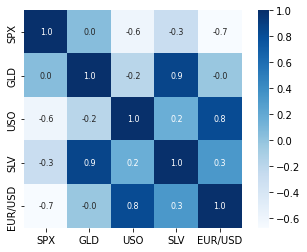

In [9]:
plt.plot(figsize=(10,10))
sns.heatmap(correlation , cbar=True, square=True ,fmt='.1f' , annot=True , annot_kws ={'size':8} , cmap='Blues')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


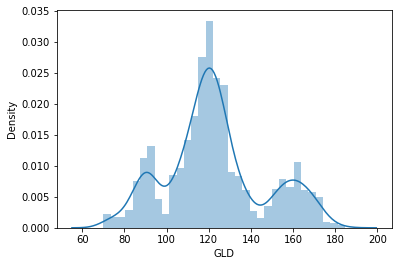

In [10]:
sns.distplot(df['GLD'])

In [11]:
X = df.drop(columns =['Date','GLD'],axis=1)
Y = df['GLD']

In [12]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [13]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [15]:
X_train , X_test , Y_train , Y_test =train_test_split(X , Y , test_size=0.2 , random_state =2 )

In [16]:
regressor = RandomForestRegressor(n_estimators =100)

In [17]:
regressor.fit(X_train , Y_train)

RandomForestRegressor()

In [19]:
test_data_predict = regressor.predict(X_test)

In [20]:
print(test_data_predict)

[168.55279928  82.01249989 116.30980057 127.58940066 120.6627012
 154.85969771 150.14059947 126.12320062 117.44789897 126.08140026
 117.03210059 171.75710098 141.73899875 167.91509824 115.38960019
 117.61180047 138.62450347 170.26420109 159.7666027  161.47259957
 154.97200021 125.20530041 175.75410015 157.81220309 125.2282005
  93.8018996   77.60070004 120.56440014 119.10699951 167.36309952
  88.20940045 125.21399995  91.15350077 117.6683002  121.13089888
 135.75210024 115.30390101 115.16310062 146.80399963 107.65620139
 104.2109022   87.14669779 126.54610067 117.89730021 152.35099898
 119.64530007 108.45079986 108.41949852  93.2257003  126.97299799
  75.03430017 113.62609896 121.23790027 111.17589943 118.90619881
 120.6105     160.12820104 168.24240158 147.10449691  85.9493986
  94.27830022  86.92419877  90.4883998  118.83530089 126.48650097
 127.51710034 170.55340008 122.25199912 116.98699904  98.40769999
 168.53810212 142.86309894 132.3676029  121.17660222 120.95269958
 119.74220064

In [23]:
error_score = metrics.r2_score(Y_test , test_data_predict)
print(error_score)

0.9895761134329595


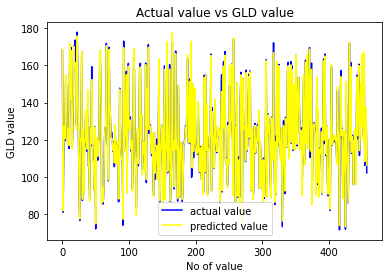

In [27]:
Y_test = list(Y_test)
plt.plot(Y_test , color='blue' , label='actual value')
plt.plot(test_data_predict , color='yellow' , label='predicted value')
plt.title('Actual value vs GLD value')
plt.xlabel('No of value')
plt.ylabel('GLD value')
plt.legend()
plt.show()